<a href="https://colab.research.google.com/github/p16111121/fcc_book_recommendation_knn_test/blob/main/fcc_book_recommendation_knn_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries (you may add additional imports but you may not have to)
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

In [2]:
# get data files
!wget https://cdn.freecodecamp.org/project-data/books/book-crossings.zip

!unzip book-crossings.zip

books_filename = 'BX-Books.csv'
ratings_filename = 'BX-Book-Ratings.csv'

--2024-12-18 06:10:37--  https://cdn.freecodecamp.org/project-data/books/book-crossings.zip
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.2.33, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26085508 (25M) [application/zip]
Saving to: ‘book-crossings.zip.2’

book-crossings.zip. 100%[===================>]  24.88M  --.-KB/s    in 0.1s    

2024-12-18 06:10:38 (173 MB/s) - ‘book-crossings.zip.2’ saved [26085508/26085508]

Archive:  book-crossings.zip
replace BX-Book-Ratings.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: BX-Book-Ratings.csv     
replace BX-Books.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: BX-Books.csv            
replace BX-Users.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: BX-Users.csv            


In [3]:
# import csv data into dataframes
df_books = pd.read_csv(
    books_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['isbn', 'title', 'author'],
    usecols=['isbn', 'title', 'author'],
    dtype={'isbn': 'str', 'title': 'str', 'author': 'str'})

df_ratings = pd.read_csv(
    ratings_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['user', 'isbn', 'rating'],
    usecols=['user', 'isbn', 'rating'],
    dtype={'user': 'int32', 'isbn': 'str', 'rating': 'float32'})

In [4]:
print(df_books.info())
print(df_books.shape)
df_books.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271379 entries, 0 to 271378
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   isbn    271379 non-null  object
 1   title   271379 non-null  object
 2   author  271377 non-null  object
dtypes: object(3)
memory usage: 6.2+ MB
None
(271379, 3)


,isbn,title,author
0,0195153448,Classical Mythology,Mark P. O. Morford
1,0002005018,Clara Callan,Richard Bruce Wright
2,0060973129,Decision in Normandy,Carlo D'Este
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata
4,0393045218,The Mummies of Urumchi,E. J. W. Barber


In [5]:
print(df_ratings.info())
print(df_ratings.shape)
df_ratings.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   user    1149780 non-null  int32  
 1   isbn    1149780 non-null  object 
 2   rating  1149780 non-null  float32
dtypes: float32(1), int32(1), object(1)
memory usage: 17.5+ MB
None
(1149780, 3)


,user,isbn,rating
0,276725,034545104X,0.0
1,276726,0155061224,5.0
2,276727,0446520802,0.0
3,276729,052165615X,3.0
4,276729,0521795028,6.0


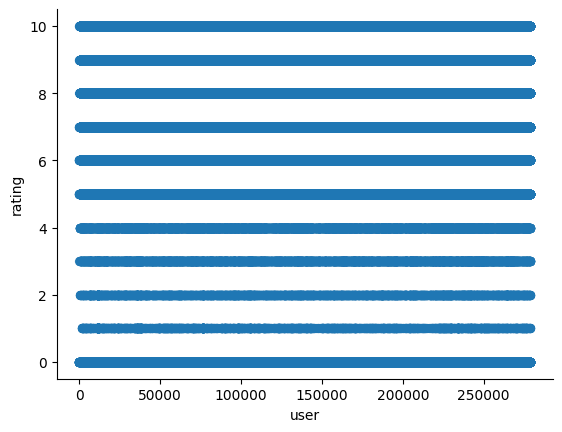

In [6]:
# @title user vs rating

from matplotlib import pyplot as plt
df_ratings.plot(kind='scatter', x='user', y='rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [7]:
# add your code here - consider creating a new cell for each section of code
user_counts = df_ratings['user'].value_counts()
active_users = user_counts[user_counts >= 200].index

df_ratings_rm = df_ratings[df_ratings['user'].isin(active_users)]
print(len(df_ratings_rm))
df_ratings_rm.head()



527556


,user,isbn,rating
1456,277427,002542730X,10.0
1457,277427,0026217457,0.0
1458,277427,003008685X,8.0
1459,277427,0030615321,0.0
1460,277427,0060002050,0.0


In [8]:
book_counts = df_ratings['isbn'].value_counts()
popular_books = book_counts[book_counts >= 100].index
df_ratings_rm = df_ratings_rm[df_ratings_rm['isbn'].isin(popular_books)]
print(len(df_ratings_rm))
df_ratings_rm.head()

49781


,user,isbn,rating
1456,277427,002542730X,10.0
1469,277427,0060930535,0.0
1471,277427,0060934417,0.0
1474,277427,0061009059,9.0
1484,277427,0140067477,0.0


In [15]:
df = df_ratings_rm.pivot(index='isbn', columns='user', values='rating').fillna(0)
df.index = df.join(df_books.set_index('isbn'))['title']
df.head()

user,254,2276,2766,2977,3363,4017,4385,6242,6251,6323,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
Politically Correct Bedtime Stories: Modern Tales for Our Life and Times,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0
Angels,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Boy Next Door,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Men Are from Mars, Women Are from Venus: A Practical Guide for Improving Communication and Getting What You Want in Your Relationships",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Divine Secrets of the Ya-Ya Sisterhood : A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
from sklearn.neighbors import NearestNeighbors

model = NearestNeighbors(metric='cosine', algorithm='brute')

model.fit(df.values)


NearestNeighbors(algorithm='brute', metric='cosine')

In [28]:
distances, indices = model.kneighbors([df.loc["Where the Heart Is (Oprah's Book Club (Paperback))"].values], n_neighbors=6)
print(distances, indices)

[[0.         0.7234864  0.7677075  0.7699411  0.77085835 0.8016211 ]] [[435 108  27 182 120 625]]


In [46]:
# function to return recommended books - this will be tested
def get_recommends(book = ""):
    if book not in df_books['title'].values:
      return [book, []]

    distances, indices = model.kneighbors([df.loc[book].values], n_neighbors=6)
    recommended_books_list = pd.DataFrame({
      'title'   : df.iloc[indices[0]].index.values,
      'distance': distances[0]
    }) \
    .sort_values(by='distance', ascending=False) \
    .head(5).values

    recommended_books = [book, recommended_books_list]
    return recommended_books

In [48]:
books = get_recommends("Where the Heart Is (Oprah's Book Club (Paperback))")
print(books[1])

def test_book_recommendation():
  test_pass = True
  recommends = get_recommends("Where the Heart Is (Oprah's Book Club (Paperback))")
  if recommends[0] != "Where the Heart Is (Oprah's Book Club (Paperback))":
    test_pass = False
  recommended_books = ["I'll Be Seeing You", 'The Weight of Water', 'The Surgeon', 'I Know This Much Is True']
  recommended_books_dist = [0.8, 0.77, 0.77, 0.77]
  for i in range(2):
    if recommends[1][i][0] not in recommended_books:
      test_pass = False
    if abs(recommends[1][i][1] - recommended_books_dist[i]) >= 0.05:
      test_pass = False
  if test_pass:
    print("You passed the challenge! 🎉🎉🎉🎉🎉")
  else:
    print("You haven't passed yet. Keep trying!")

test_book_recommendation()

[["I'll Be Seeing You" 0.8016210794448853]
 ['The Weight of Water' 0.7708583474159241]
 ['The Surgeon' 0.7699410915374756]
 ['I Know This Much Is True' 0.7677075266838074]
 ['The Lovely Bones: A Novel' 0.7234864234924316]]
You passed the challenge! 🎉🎉🎉🎉🎉
